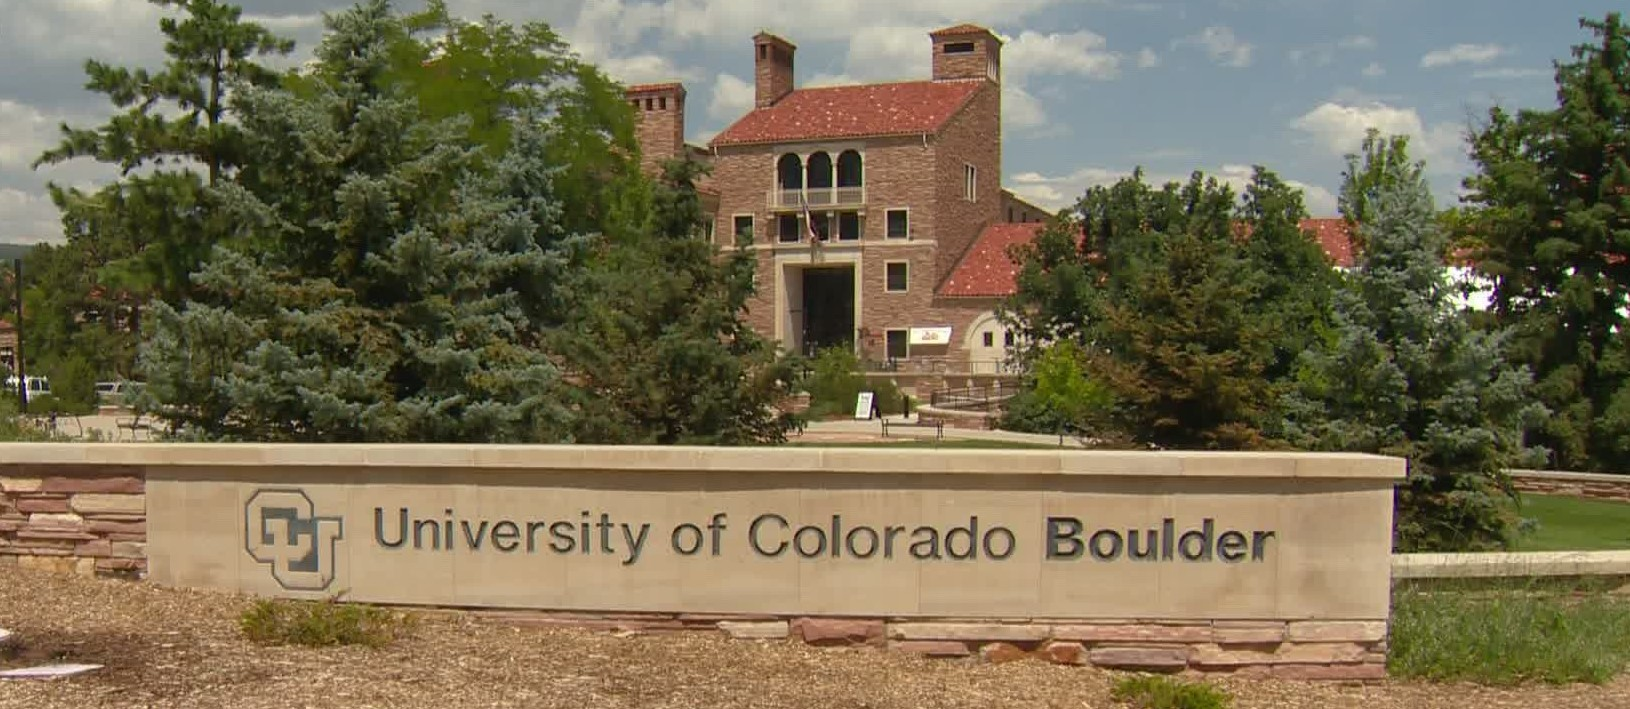

# Topic

This jupyter notebook is the final project of the University of Colorado Boulder Master of Science in Data Science courese DTSA-5510 - Unsupervised Algorithms in Machine Learning.

In this notebook I mainly tried to use technics which where part of the course, namely k-means clustering. I tried to dive a little deeper in specificly theses type of classification and to use it for object detection.

As problem and data I choose object detection in image processing and I will check how well k-means clustering performs in that area.

## Data


## Importing libraries

For Image processing I used OpenCV (https://opencv.org/) a open source image library. This has to be installed seperatry. So if you run notebook please be aware that OpenCV is installed. For details see OpenCV documentation https://docs.opencv.org.

In [127]:
import pandas as pd
import numpy as np

# for performace patch
from sklearnex import patch_sklearn
patch_sklearn() # withe larger no of trees kernel dies
 
# disable  patching
#from sklearnex import unpatch_sklearn
#unpatch_sklearn()

import matplotlib.pyplot as plt
import matplotlib.image as mpimg # for image processing
#import cv2 # OpenCV for image processing

import warnings
warnings.filterwarnings('ignore')

from time import time

#from sklearn import metrics
#from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Importing data, cleaning and analysis

### Import data and get first overview

Image are read from local folder and displayed with axes and shape.

(709, 1630, 3) uint8


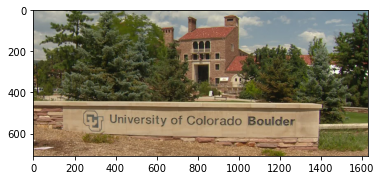

In [179]:
# Read Images
img = mpimg.imread('boulder.jpg')
#img = cv2.imread('boulder.jpg')
 
# Output Images
plt.imshow(img)

#lets check shape and datatype of image
print(img.shape, img.dtype)


The image has a default shape of #pixels in X direction (width) x Pixels in Y direction (height) x #colors. Like 1024x768x3.

For further processing with k-means we have to reshape the image into a two dimentional array of size width * height x #colors (e.g. 1024 * 768 = 786432 x 3)

We have to convert the datatype to float for k-means

In [169]:
# Reshape the image for further processing
img2d = img.reshape((-1,3))
 
# Convert to float type
img2d = np.float32(img2d)

print(img2d.shape, img2d.dtype)

(1155670, 3) float32


In [139]:
# apply kmeans clustering on image data

clusters = 3

t0 = time() # Start time for training
model = KMeans(n_clusters=clusters, random_state=0).fit(img2d)
time_train=time() - t0
print('Training time', time_train)

Training time 0.17982721328735352


(3, 3)
(1155670,)


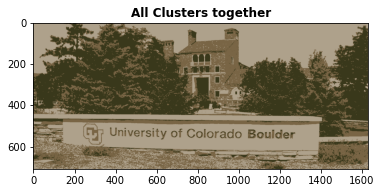

In [140]:
# convert model output back to image
# take cluster ceters is same as number of clusters we defined as input.
print(model.cluster_centers_.shape)
centers = np.uint8(model.cluster_centers_)

# reconstruct image by tyking ceters for every label (pixel)
print(model.labels_.shape)
imgout = centers[model.labels_]

# and convert it back to a 3D array with original shape
imgout = imgout.reshape((img.shape))

# Output Images
title = 'All Clusters together'
plt.title(title, fontweight ="bold")
plt.imshow(imgout)
plt.show()

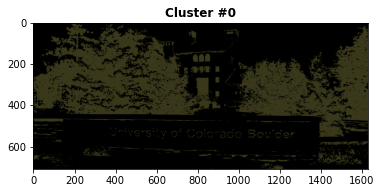

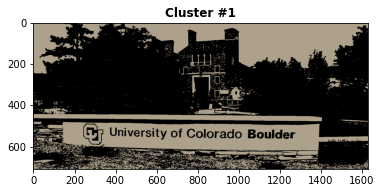

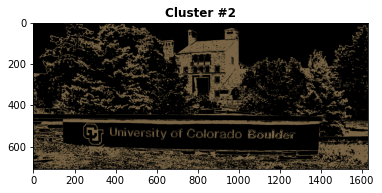

(709, 1630, 3) uint8


In [218]:
for cluster in range(clusters):
    center_slice = np.zeros(centers.shape)
    center_slice[cluster] = centers[cluster]
    #center_slice[cluster] = np.full(centers[cluster].shape, 255)
    center_slice
    
    # reconstruct image by tyking ceters for every label (pixel)
    imgout = center_slice[model.labels_]

    # and convert it back to a 3D array with original shape
    imgout = imgout.reshape((img.shape))
    
    # Convert back to uint8 type
    imgout = np.uint8(imgout)
    
    # Output Images
    title = 'Cluster #' + str(cluster)
    plt.title(title, fontweight ="bold")
    plt.imshow(imgout)
    plt.show()

# lets check shape and datatype of image
print(imgout.shape, imgout.dtype)

# Create function
Put everything togther in a function to check how it performs on different images

In [207]:
def kmeansimg(filename, n_clusters, colour = True):
    # Read Images
    img = mpimg.imread(filename)
 
    title = 'Original image'
    plt.title(title, fontweight ="bold")
    # Output Images
    plt.imshow(img)
    plt.show()

    # Reshape the image for further processing
    img2d = img.reshape((-1,3))
 
    # Convert to float type
    img2d = np.float32(img2d)

    # apply kmeans clustering on image data
    model = KMeans(n_clusters=n_clusters, random_state=0).fit(img2d)

    # convert model output back to image
    # take cluster ceters is same as number of clusters we defined as input.
    centers = np.uint8(model.cluster_centers_)

    # reconstruct image by tyking ceters for every label (pixel)
    imgout = centers[model.labels_]

    # and convert it back to a 3D array with original shape
    imgout = imgout.reshape((img.shape))
    
    # Convert back to uint8 type
    imgout = np.uint8(imgout)

    # Output Images
    title = 'All Clusters together'
    plt.title(title, fontweight ="bold")
    plt.imshow(imgout)
    plt.show()
    
    for cluster in range(n_clusters):
        center_slice = np.zeros(centers.shape)
        
        if colour == True:
            # following code if for full colour 
            center_slice[cluster] = centers[cluster]

        else:
            # drop all colour information and replace with maximum intensity (white with 255)
            center_slice[cluster] = np.full(centers[cluster].shape, 255)
        
        center_slice
        
        # reconstruct image by tyking ceters for every label (pixel)
        imgout = center_slice[model.labels_]

        # and convert it back to a 3D array with original shape
        imgout = imgout.reshape((img.shape))
        
        # Convert back to uint8 type
        imgout = np.uint8(imgout)

        # Output Images
        title = 'Cluster #' + str(cluster)
        plt.title(title, fontweight ="bold")
        plt.imshow(imgout)
        plt.show()

## CU Boulder image

I implemented a function to drop color information and replace it with maximum white to get better contrast. Without that manupulation it looks like this:

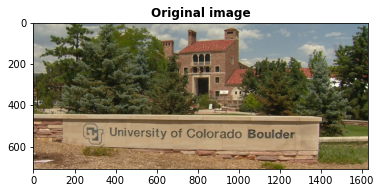

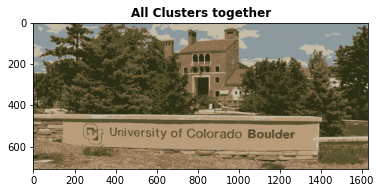

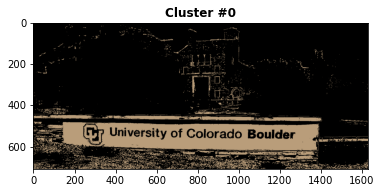

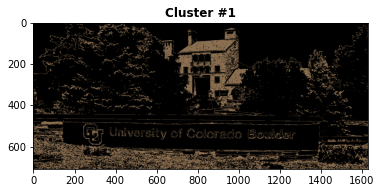

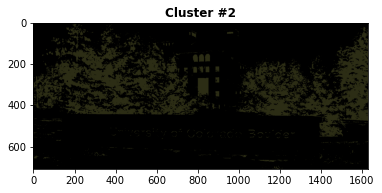

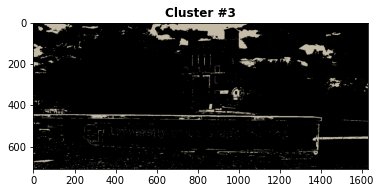

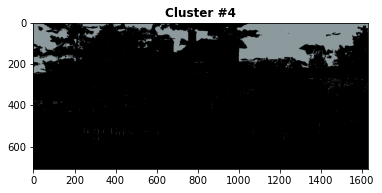

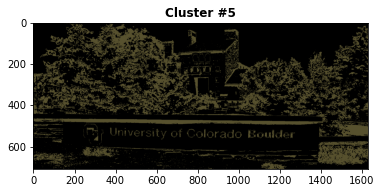

In [217]:
image = 'boulder.jpg'
n_clusters = 6

kmeansimg(image, n_clusters, colour = True)

Espacially in areas where original image has no high contast like trees before gras and sky (cluster #2) or vegetation cluster #5 structure is not visible verry well.

Lets check how it looks with that optimization:

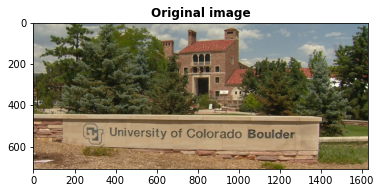

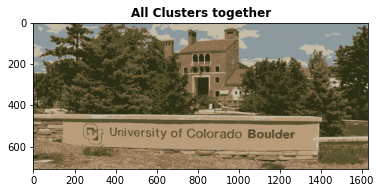

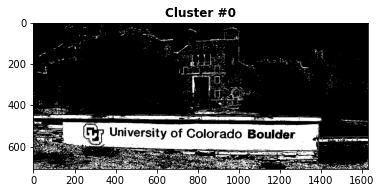

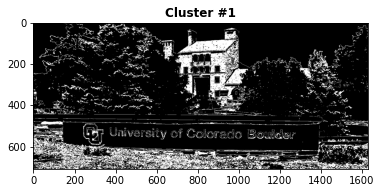

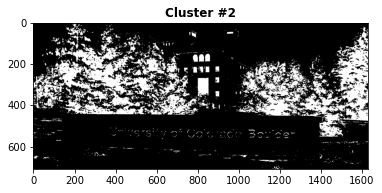

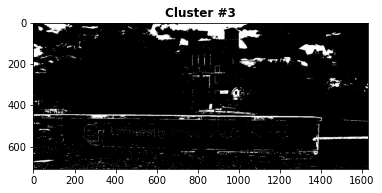

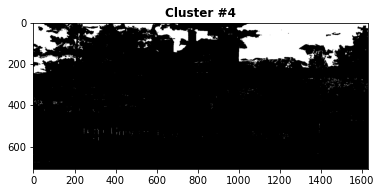

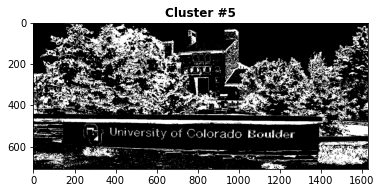

In [209]:
image = 'boulder.jpg'
n_clusters = 6

kmeansimg(image, n_clusters, colour = False)

We could clearly see an improvement that the structure becomes more visible.

This image produce with e.g. 6 k-mean clusters a nice segmentation of the picure elements.

- cluster 0 is onyl the sign
- cluster 1 buildings
- cluster 2 only trees (without gras)
- cluster 3 clouds
- cluster 4 sky
- cluster trees and gras

## Satelite map Boulder

Let's check on satelite data from ESA Copernicus_Programme https://en.wikipedia.org/wiki/Copernicus_Programme for Boulder

Data Contains modified Copernicus Sentinel data 2022

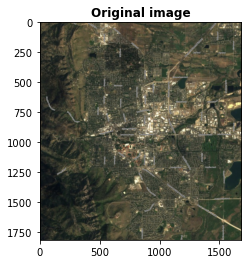

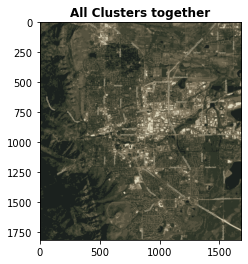

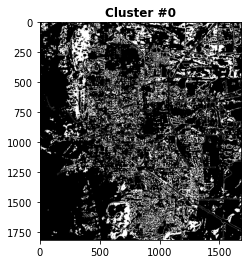

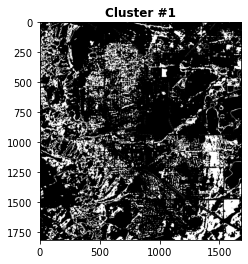

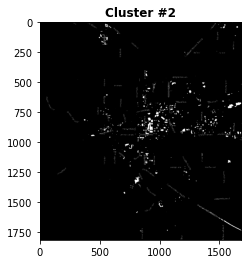

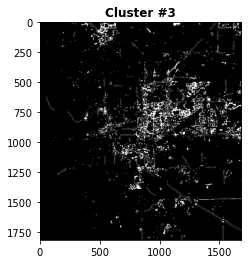

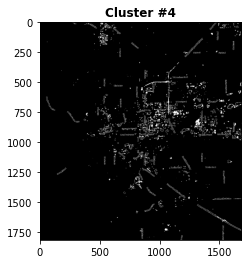

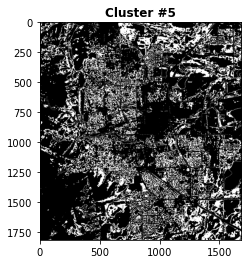

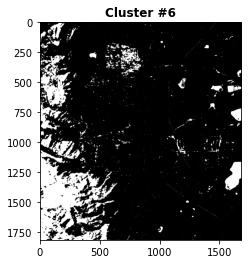

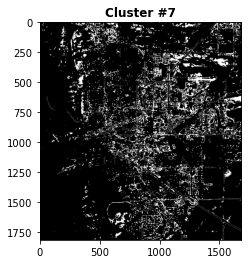

In [205]:
image = 'boulder_copernicus_2022.jpg'
n_clusters = 8

kmeansimg(image, n_clusters, colour = False)

This image produce with 8 k-mean clusters a nice segmentation of the map elements.

We see segmentation in Streets and industrie, vegetation, mountains and sees etc.

## Portrait

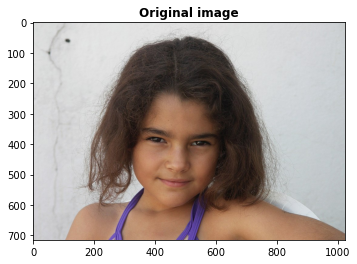

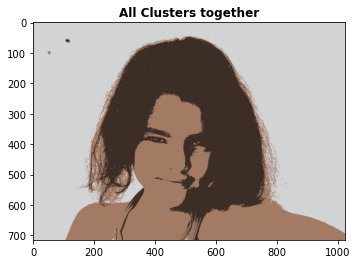

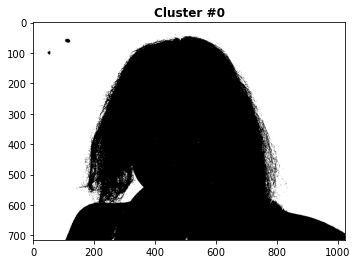

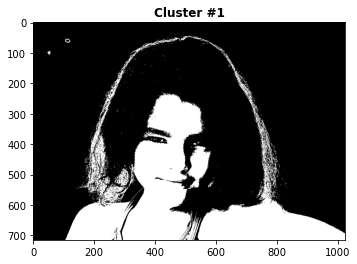

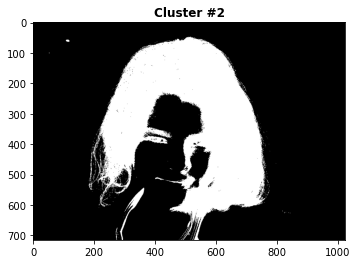

In [210]:
image = 'PortraitGirl2005-1a.jpg'
n_clusters = 3

kmeansimg(image, n_clusters, colour = False)

This image produce with 3 k-mean clusters a nice segmentation of the picure elements.

- cluster 0 Background
- cluster 1 Skin
- cluster 2 Hair

Originanl image from https://commons.wikimedia.org/wiki/File:PortraitGirl2005-1a.jpg
Alvesgaspar, CC BY-SA 3.0 <http://creativecommons.org/licenses/by-sa/3.0/>, via Wikimedia Commons

## Bacteria

Original Image https://commons.wikimedia.org/wiki/File:Variety_of_Gram_positive_and_Negative_bacteria_in_Gram_stain_of_Sewage.jpg
Ajay Kumar Chaurasiya, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons

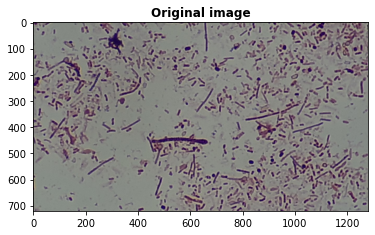

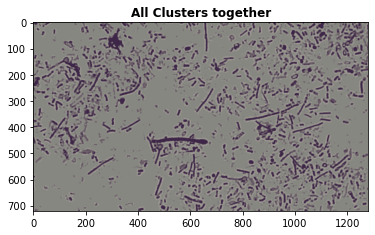

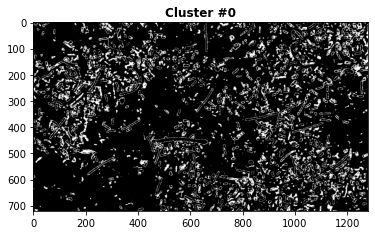

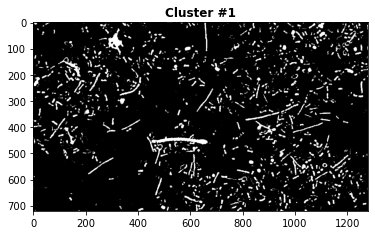

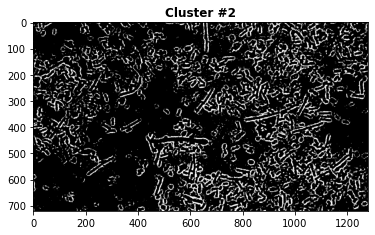

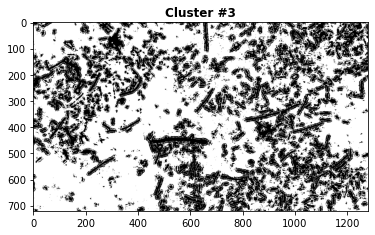

In [216]:
image = 'Variety_of_Gram_positive_and_Negative_bacteria_in_Gram_stain_of_Sewage.jpg'
n_clusters = 4

kmeansimg(image, n_clusters, colour = False)

## Conclusion

First of all I learned a lot during this project. Beside the theoretical part covered during the course espacially here the image processing was verry interesting and a big step for me.



More data preprocessing and/or postprocessing could probably lead to further improvements. 